In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print(f"Dataset loaded successfully from {file_path}")
        return data
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except pd.errors.EmptyDataError:
        print("No data found in the file.")
    except pd.errors.ParserError:
        print("Error parsing the file.")

    except Exception as e:
        print(f"Error loading the dataset: {e}")
    return None
AirlineData = load_data("after cleaning data/Indian_Airline_data.csv")
BusinessData = load_data("after cleaning data/Business_data.csv")
EconomyData = load_data("after cleaning data/Economy_data.csv")

# AirlineData.head()

Dataset loaded successfully from after cleaning data/Indian_Airline_data.csv
Dataset loaded successfully from after cleaning data/Business_data.csv
Dataset loaded successfully from after cleaning data/Economy_data.csv


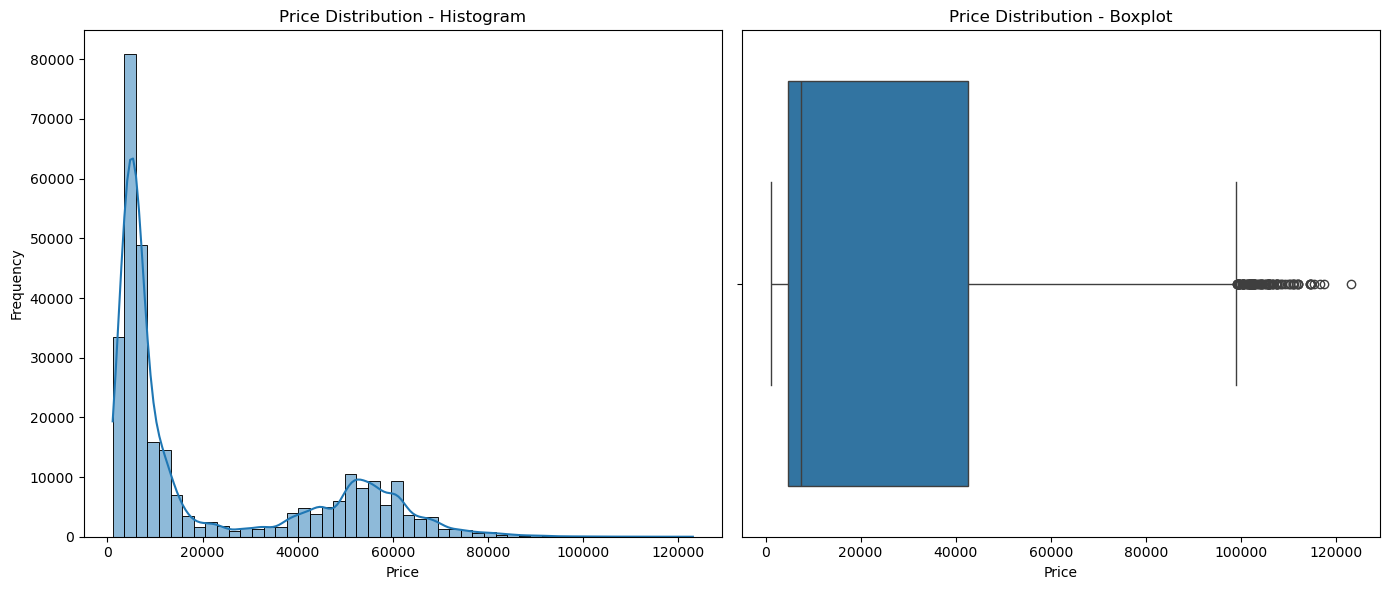

In [2]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(AirlineData['price'], bins=50, kde=True)
plt.title('Price Distribution - Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=AirlineData['price'])
plt.title('Price Distribution - Boxplot')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

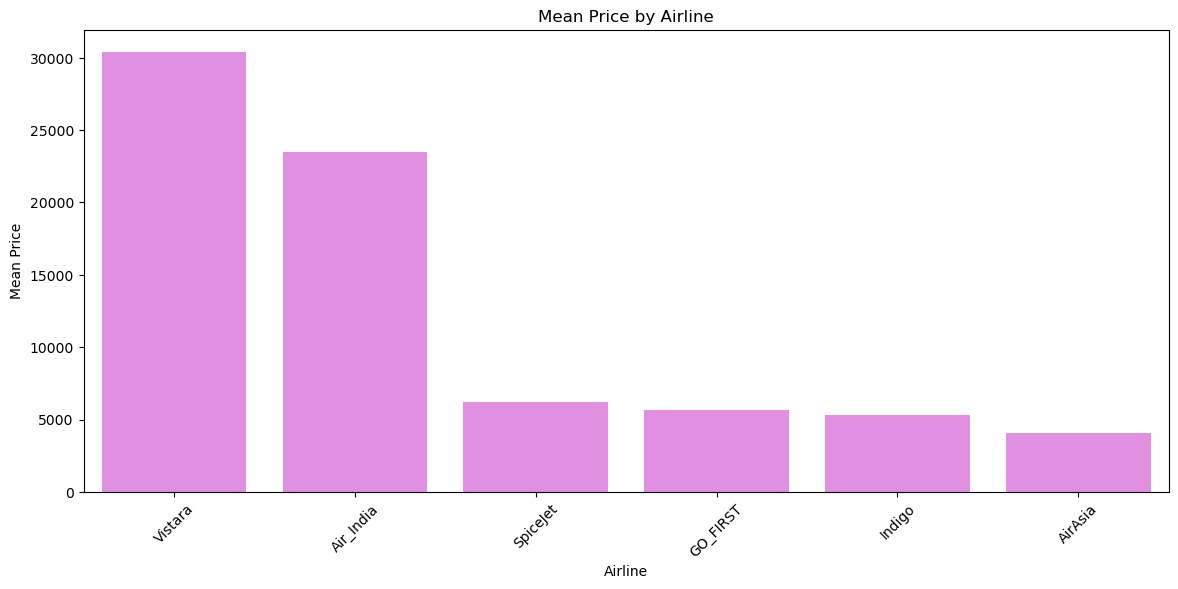

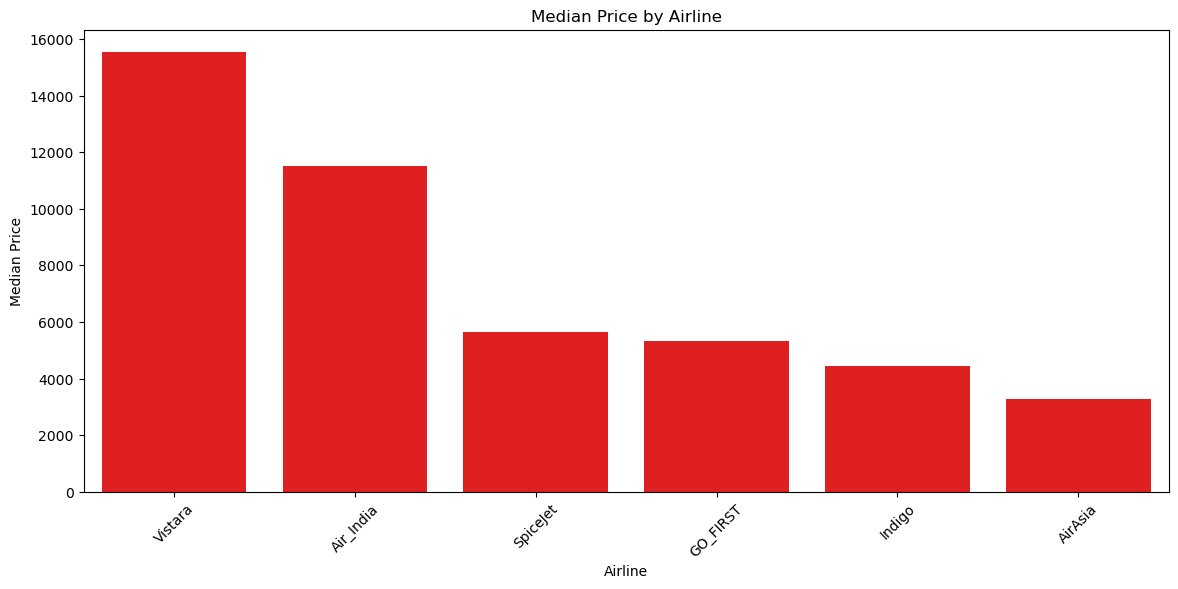

In [3]:
plt.figure(figsize=(14, 6))

# Mean price by airline
mean_prices = AirlineData.groupby('airline')['price'].mean().sort_values(ascending=False)
sns.barplot(x=mean_prices.index, y=mean_prices.values , color='violet')
plt.title('Mean Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()

# Median price by airline
plt.figure(figsize=(14, 6))
median_prices = AirlineData.groupby('airline')['price'].median().sort_values(ascending=False)
sns.barplot(x=median_prices.index, y=median_prices.values , color='red')
plt.title('Median Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

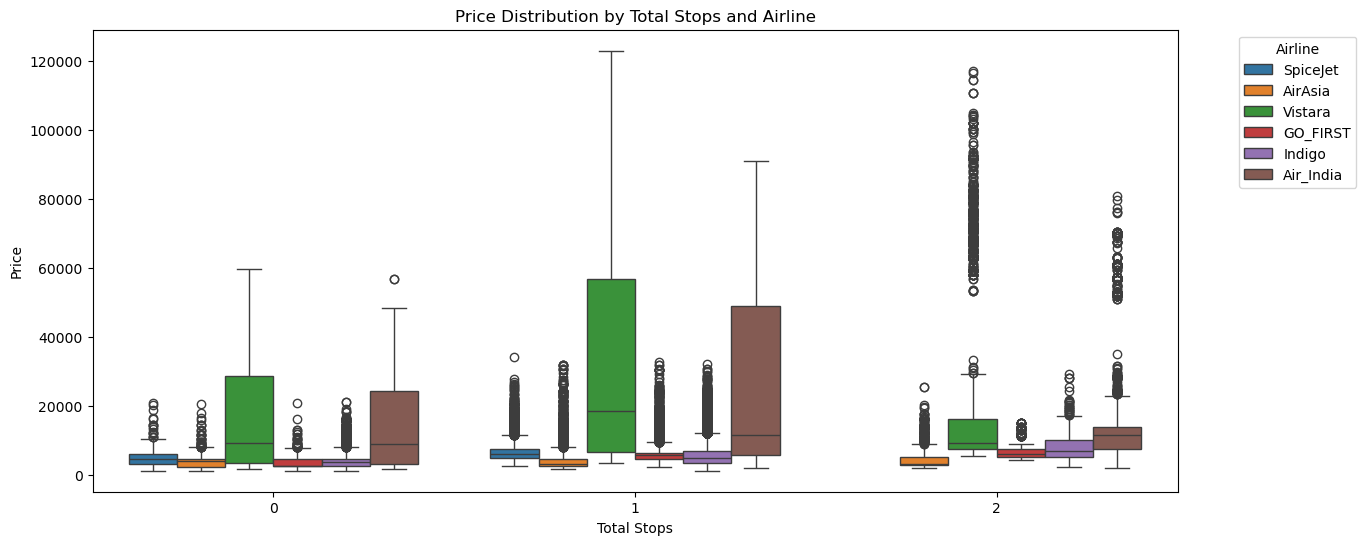

In [4]:

#boxplot for price distribution by total stops and airline
plt.figure(figsize=(14, 6)) 
sns.boxplot(data=AirlineData, x='total_stop', y='price', hue='airline')
plt.title('Price Distribution by Total Stops and Airline')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

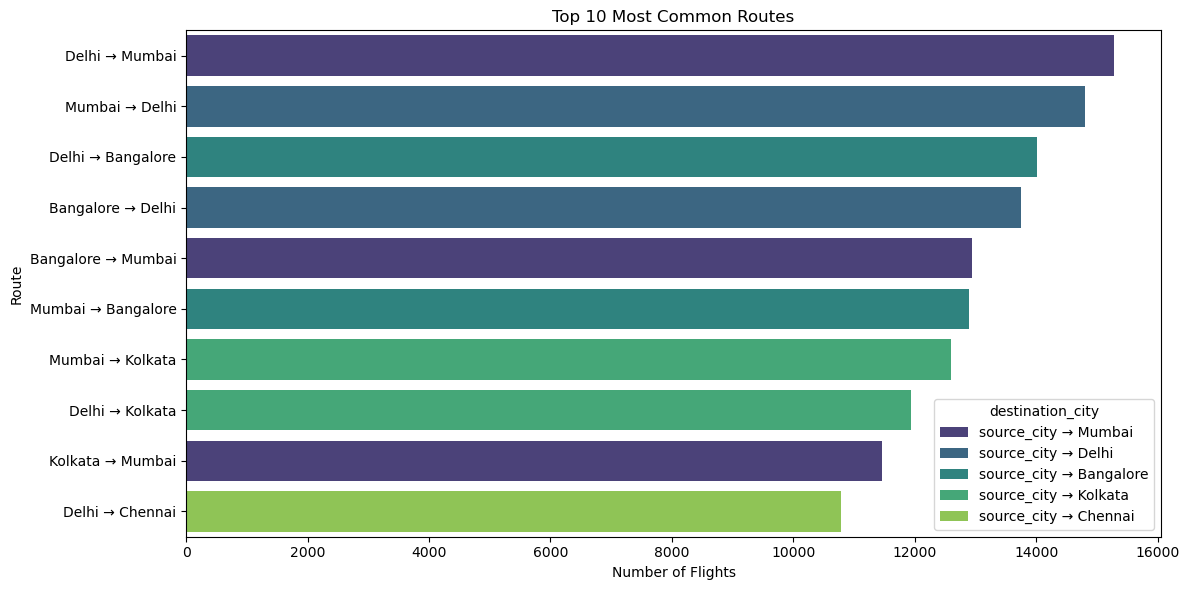

In [5]:

# Find the most common routes (source_city to destination_city) in AirlineData
route_counts = AirlineData.groupby(['source_city', 'destination_city']).size().reset_index(name='count')
most_common_routes = route_counts.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=most_common_routes,
    x='count',
    y=most_common_routes['source_city'] + " → " + most_common_routes['destination_city'],
    palette='viridis',hue='source_city' + " → " + most_common_routes['destination_city']
)
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.title('Top 10 Most Common Routes')
plt.tight_layout()
plt.show()

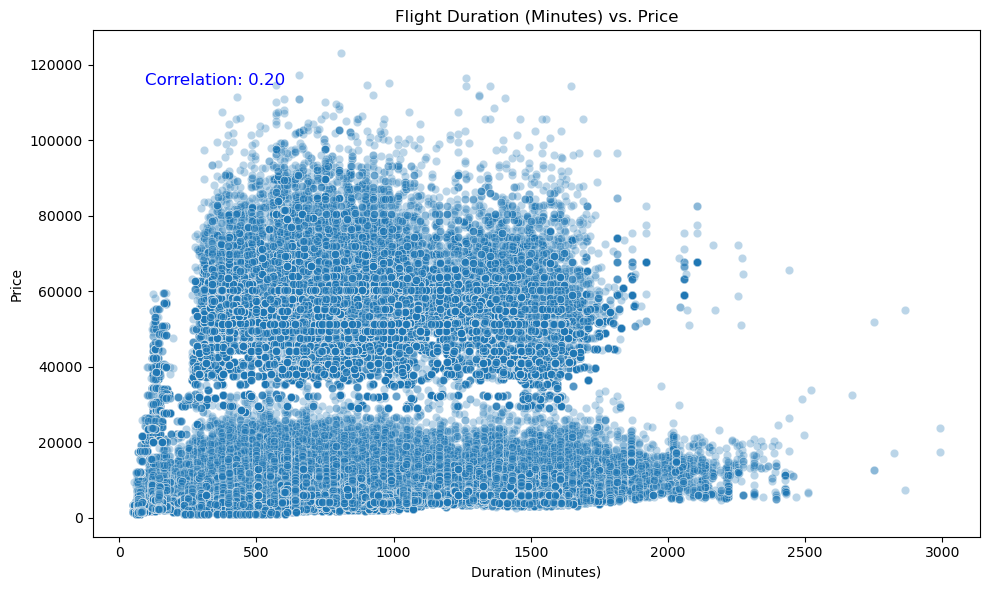

In [6]:
# Scatterplot of Duration vs. Price and correlation calculation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=AirlineData['Duration_in_Minutes'], y=AirlineData['price'], alpha=0.3)
plt.title('Flight Duration (Minutes) vs. Price')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Price')

# Calculate correlation
corr = AirlineData['Duration_in_Minutes'].corr(AirlineData['price'])
plt.figtext(0.15, 0.85, f'Correlation: {corr:.2f}', fontsize=12, color='blue')

plt.tight_layout()
plt.show()

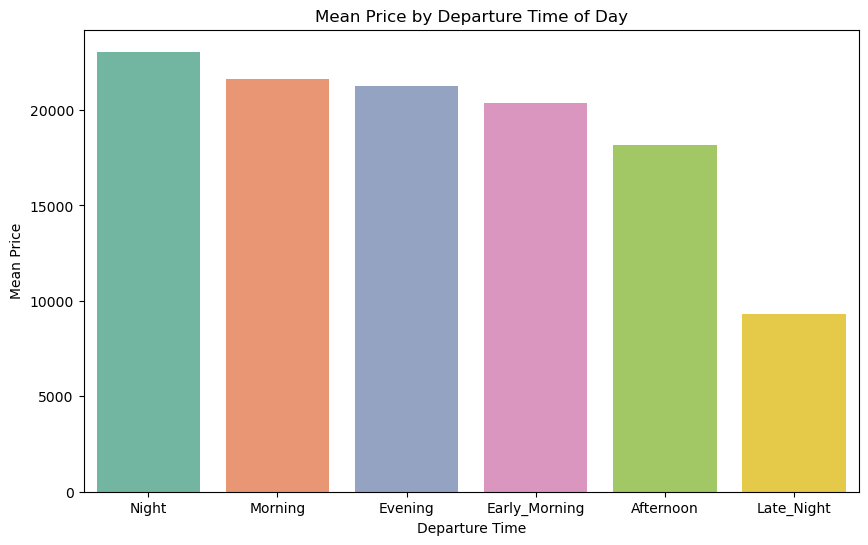

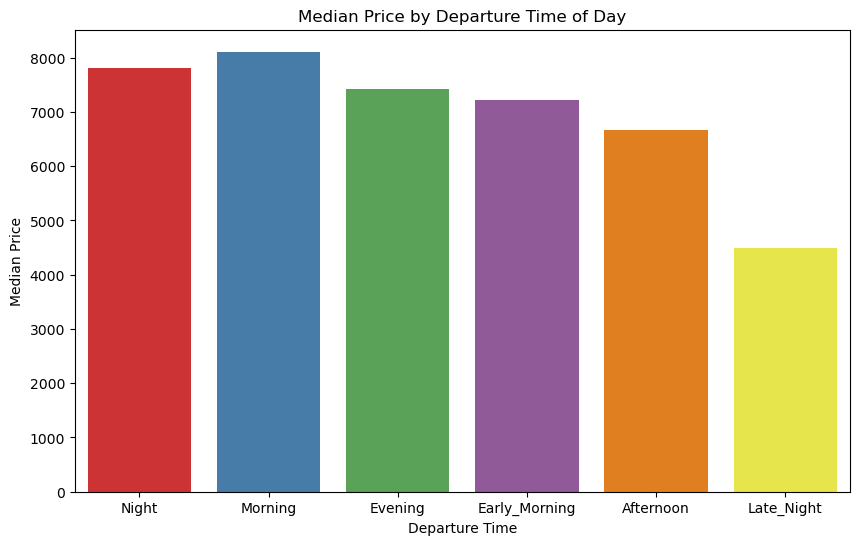

                        mean  median  count
departure_time                             
Night           23062.146808  7813.0  48015
Morning         21630.760254  8112.0  71146
Evening         21232.361894  7425.0  65102
Early_Morning   20370.676718  7212.0  66790
Afternoon       18179.203331  6663.0  47794
Late_Night       9295.299387  4499.0   1306


In [7]:
# Group by departure_time and calculate mean and median price
departure_price_stats = AirlineData.groupby('departure_time')['price'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=departure_price_stats.index, y=departure_price_stats['mean'], palette='Set2' , hue=departure_price_stats.index)
plt.title('Mean Price by Departure Time of Day')
plt.xlabel('Departure Time')
plt.ylabel('Mean Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=departure_price_stats.index, y=departure_price_stats['median'], palette='Set1',hue=departure_price_stats.index)
plt.title('Median Price by Departure Time of Day')
plt.xlabel('Departure Time')
plt.ylabel('Median Price')
plt.show()

print(departure_price_stats)

In [8]:
from scipy.stats import zscore

# Detect outliers in 'price' column of AirlineData using IQR and Z-score methods

# IQR method
Q1 = AirlineData['price'].quantile(0.25)
Q3 = AirlineData['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = AirlineData[(AirlineData['price'] < lower_bound) | (AirlineData['price'] > upper_bound)]
print(f"Number of outliers detected by IQR: {outliers_iqr.shape[0]}")

# Z-score method
z_scores = zscore(AirlineData['price'])
outliers_z = AirlineData[(np.abs(z_scores) > 3)]
print(f"Number of outliers detected by Z-score: {outliers_z.shape[0]}")

Number of outliers detected by IQR: 123
Number of outliers detected by Z-score: 602


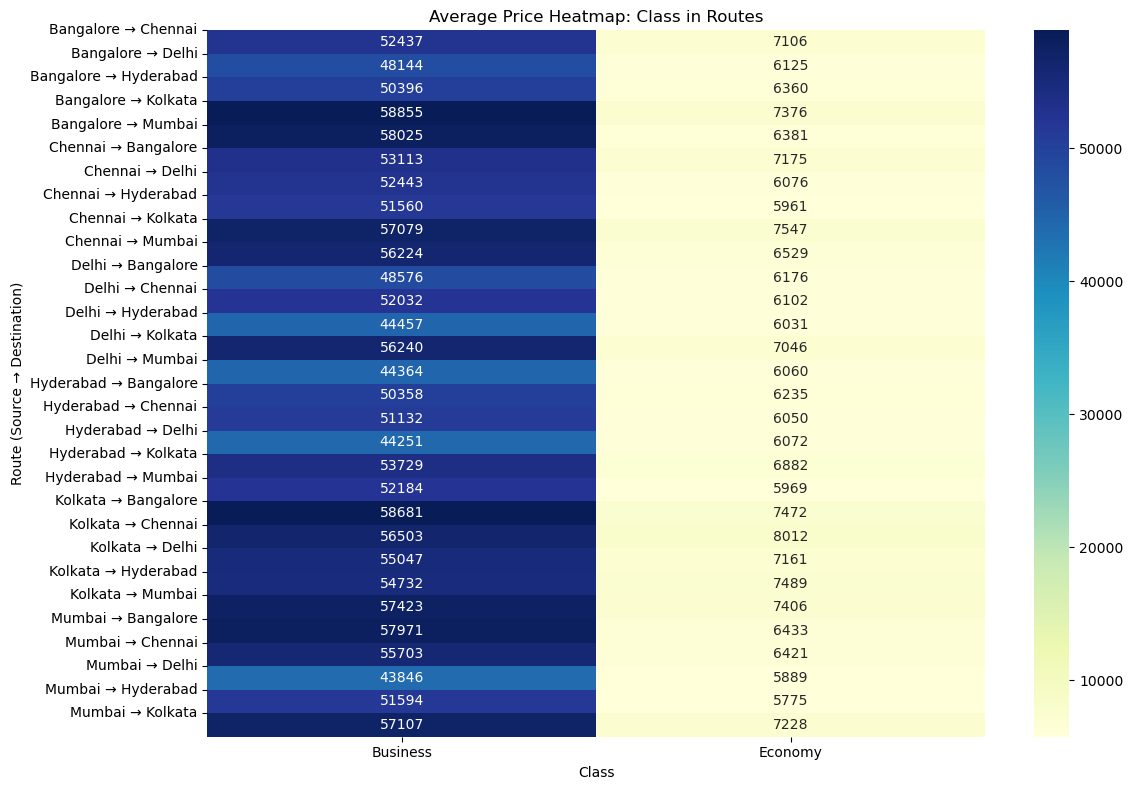

In [9]:
# Create a pivot table for average price by route (source_city → destination_city) and class
pivot = AirlineData.pivot_table(
    index=['source_city', 'destination_city'],
    columns='class',
    values='price',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Price Heatmap: Class in Routes')
plt.xlabel('Class')
plt.ylabel('Route (Source → Destination)')
plt.yticks(
    ticks=np.arange(len(pivot.index)),
    labels=[f"{src} → {dst}" for src, dst in pivot.index],
    rotation=0
)
plt.tight_layout()
plt.show()